In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,datasets
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
classes[8]

'ship'

In [ ]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

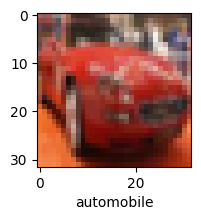

In [ ]:
plot_sample(X_train , y_train , 5)

In [ ]:
#normalizing the pixel value from 0 to 1 range

In [ ]:
X_train[0]/255
X_test[0]/255

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [ ]:
#building the ANN first


In [ ]:
ann_models = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(units = 1000 , activation = 'relu'),
    layers.Dense(units = 1000 , activation = 'relu'),
    layers.Dense(units = 10 , activation = 'sigmoid')


])

In [ ]:
ann_models.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

In [ ]:
ann_models.fit(X_train,y_train,epochs =10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 18.1481 - accuracy: 0.1225
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3025 - accuracy: 0.1016
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.0982
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3029 - accuracy: 0.0969
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0955
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.3028 - accuracy: 0.0974
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3032 - accuracy: 0.0951
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0997
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0982
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.30

In [ ]:
ann_models.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])


In [ ]:
ann_models.fit(X_test,y_test,epochs = 10)

Epoch 1/10
313/313 [==============================] - 2s 4ms/step - loss: 2.3048 - accuracy: 0.0967
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 2.3029 - accuracy: 0.0995
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 2.3029 - accuracy: 0.0971
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 2.3029 - accuracy: 0.0988
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 2.3028 - accuracy: 0.0967
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 2.3029 - accuracy: 0.0958
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3028 - accuracy: 0.0954
Epoch 8/10
313/313 [==============================] - 1s 5ms/step - loss: 2.3028 - accuracy: 0.0959
Epoch 9/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3028 - accuracy: 0.0930
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3028 - accuracy: 0.0925

In [ ]:
#ANN is doing really very bad on this dataset..so we will do cnn

In [ ]:

cnn_models = models.Sequential([

    #cnn
    layers.Conv2D(filters = 32 ,kernel_size = (3,3),activation = 'relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 32 ,kernel_size = (3,3),activation = 'relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(units = 64 , activation = 'relu'),
    layers.Dense(units = 10 , activation = 'softmax')


])

In [ ]:
cnn_models.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

In [ ]:
cnn_models.fit(X_train,y_train,epochs =20)

Epoch 1/20
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8353 - accuracy: 0.3859
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3215 - accuracy: 0.5313
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1738 - accuracy: 0.5897
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0862 - accuracy: 0.6228
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0211 - accuracy: 0.6447
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9661 - accuracy: 0.6654
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9203 - accuracy: 0.6796
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8871 - accuracy: 0.6931
Epoch 9/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8640 - accuracy: 0.7020
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.833

In [ ]:
cnn_models.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1961 - accuracy: 0.6503


[1.196058750152588, 0.6503000259399414]

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
y_pred = cnn_models.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[2.6984699e-03, 6.4481879e-05, 5.0770589e-03, 8.6498785e-01,
        1.9781911e-03, 9.1677919e-02, 1.9706111e-02, 3.0347195e-03,
        1.0418143e-02, 3.5700947e-04],
       [1.5079656e-02, 1.2262391e-01, 1.1224066e-06, 4.2415186e-07,
        2.9372979e-10, 1.3645622e-09, 1.6038489e-07, 8.2507396e-09,
        8.6024356e-01, 2.0511663e-03],
       [3.8253501e-02, 6.9826305e-02, 1.4411287e-02, 2.2288186e-02,
        8.2510393e-03, 3.0094706e-03, 1.1779526e-02, 3.1767797e-03,
        6.2491333e-01, 2.0409058e-01],
       [4.7632521e-01, 8.5923230e-06, 1.1013453e-02, 1.0000271e-03,
        3.4714451e-03, 4.1995256e-04, 4.6733985e-04, 1.1909588e-04,
        5.0702620e-01, 1.4875943e-04],
       [1.7479691e-05, 7.1844543e-06, 2.1351869e-03, 3.6379960e-03,
        5.3263525e-04, 7.8327674e-04, 9.9285853e-01, 1.1699316e-05,
        1.1876495e-05, 4.0494383e-06]], dtype=float32)

In [ ]:
#argmax funvctn will help to find the max among these ten columnms in each row

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 8, 8, 8, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

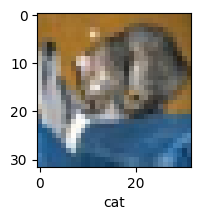

In [ ]:
plot_sample(X_test,y_test,0)


In [ ]:
classes[y_classes[0]]

'cat'

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = ann_models.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 1s 2ms/step


print("Classification report \n :",classification_report(y_test,y_pred_classes))

In [ ]:
print("Classification Report :", classification_report(y_test,y_classes))

Classification Report :               precision    recall  f1-score   support

           0       0.74      0.60      0.66      1000
           1       0.77      0.82      0.80      1000
           2       0.59      0.48      0.53      1000
           3       0.41      0.61      0.49      1000
           4       0.62      0.53      0.57      1000
           5       0.65      0.46      0.54      1000
           6       0.59      0.83      0.69      1000
           7       0.76      0.66      0.71      1000
           8       0.72      0.83      0.77      1000
           9       0.81      0.69      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.67      0.65      0.65     10000
weighted avg       0.67      0.65      0.65     10000

